In [10]:
# XBRAIN demo notebook

# ilastik params
classifier_file = 'xbrain_vessel_seg_v5_2.ilp'
ram_size = 4000 #4000 MB                                                                            
no_of_threads = 8

# Cell detection parameters                                                                         
cell_probability_threshold  = 0.2
stopping_criterion = 0.47
initial_template_size = 18
dilation_size = 8
max_no_cells = 500

# Vessel segmentation parameters                                                                    
vessel_probability_threshold = .68
dilation_size = 3
minimum_size = 4000



In [11]:
# imports 

import numpy as np
import scipy.io as sio
from PIL import Image
import ndparse as ndp
import xbrain

In [12]:
input_data = np.load('./xbrain_test_set_2a.npy')

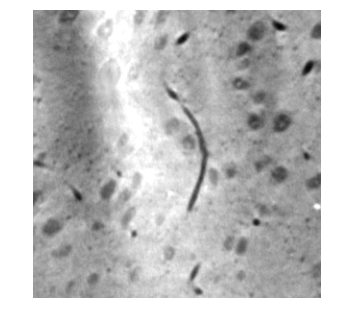

In [13]:
ndp.plot(input_data,50)

In [14]:
probability_maps = xbrain.classify_pixel(input_data, classifier_file, threads=no_of_threads, ram=ram_size)


WARNING default_config.py(243): ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/conda/ilastik-meta/ilastik/ilastik/ilastik_logging/logging_config.json' mode='r' encoding='UTF-8'>


INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
Starting ilastik from "/opt/conda".
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9Gi

WARNING memory.py(100): DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
WARNING 2017-10-05 13:53:29,593 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.
WARNING 2017-10-05 13:53:29,593 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.
WARNING 2017-10-05 13:53:29,593 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.
WARNING 2017-10-05 13:53:29,593 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.
WARNING 2017-10-05 13:53:29,593 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.


INFO ilastik.shell.projectManager: Opening Project: xbrain_vessel_seg_v5_2.ilp
INFO ilastik.shell.projectManager: Opening Project: xbrain_vessel_seg_v5_2.ilp
INFO ilastik.shell.projectManager: Opening Project: xbrain_vessel_seg_v5_2.ilp
INFO ilastik.shell.projectManager: Opening Project: xbrain_vessel_seg_v5_2.ilp
INFO ilastik.shell.projectManager: Opening Project: xbrain_vessel_seg_v5_2.ilp
INFO ilastik.shell.headless.headlessShell: Importing project as 'xbrain_vessel_seg_v5_2_imported.ilp'
INFO ilastik.shell.headless.headlessShell: Importing project as 'xbrain_vessel_seg_v5_2_imported.ilp'
INFO ilastik.shell.headless.headlessShell: Importing project as 'xbrain_vessel_seg_v5_2_imported.ilp'
INFO ilastik.shell.headless.headlessShell: Importing project as 'xbrain_vessel_seg_v5_2_imported.ilp'
INFO ilastik.shell.headless.headlessShell: Importing project as 'xbrain_vessel_seg_v5_2_imported.ilp'


WARNING bind.py(27): DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()


NameError: name 'importFromPath' is not defined

In [6]:
from __future__ import print_function
from collections import OrderedDict

import numpy
import vigra

import ilastik_main
from ilastik.applets.dataSelection import DatasetInfo
from ilastik.workflows.pixelClassification import PixelClassificationWorkflow


AttributeError: 'module' object has no attribute 'manualTrackingWorkflow'

In [1]:
import numpy

In [9]:
"""
This script provides an example of how a pre-trained ilastik 
PixelClassification project can be used to generate predictions 
from within Python, without the need to read/write data from disk. 
Once the project is loaded, this script doesn't touch the hard-disk.
"""
from __future__ import print_function
from collections import OrderedDict
import os
import numpy
import vigra

import ilastik_main
from ilastik.applets.dataSelection import DatasetInfo
from ilastik.workflows.pixelClassification import PixelClassificationWorkflow

# Before we start ilastik, optionally prepare these environment variable settings.
os.environ["LAZYFLOW_THREADS"] = "2"
os.environ["LAZYFLOW_TOTAL_RAM_MB"] = "2000"

# Programmatically set the command-line arguments directly into the argparse.Namespace object
# Provide your project file, and don't forget to specify headless.
args = ilastik_main.parser.parse_args([])
args.headless = True
args.project = '../library/ilastik_classifiers/pixelClassification.ilp' # REPLACE WITH YOUR PROJECT FILE

# Instantiate the 'shell', (in this case, an instance of ilastik.shell.HeadlessShell)
# This also loads the project file into shell.projectManager
shell = ilastik_main.main( args )
assert isinstance(shell.workflow, PixelClassificationWorkflow)

# Obtain the training operator
opPixelClassification = shell.workflow.pcApplet.topLevelOperator

# Sanity checks
assert len(opPixelClassification.InputImages) > 0
assert opPixelClassification.Classifier.ready()

# For this example, we'll use random input data to "batch process"
input_data1 = numpy.random.randint(0,255, (200,200,1) ).astype(numpy.uint8)
input_data2 = numpy.random.randint(0,255, (300,300,1) ).astype(numpy.uint8)
print(input_data1.shape)

# In this example, we're using 2D data (with an extra dimension for  channel).
# Tagging the data this way ensures that ilastik interprets the axes correctly.
input_data1 = vigra.taggedView( input_data1, 'yxc' )
input_data2 = vigra.taggedView( input_data2, 'yxc' )

# In case you're curious about which label class is which,
# let's read the label names from the project file.
label_names = opPixelClassification.LabelNames.value
label_colors = opPixelClassification.LabelColors.value
probability_colors = opPixelClassification.PmapColors.value

print(label_names, label_colors, probability_colors)

# Construct an OrderedDict of role-names -> DatasetInfos
# (See PixelClassificationWorkflow.ROLE_NAMES)
role_data_dict = OrderedDict([ ("Raw Data", [ DatasetInfo(preloaded_array=input_data1),
                                              DatasetInfo(preloaded_array=input_data2) ]) ]) 

## Note: If you want to pull your data from disk instead of in-memory, just provide filepaths like so:
# role_data_dict = OrderedDict([ ("Raw Data", [ '/path/to/input-file-1.png',
#                                               '/path/to/input-file-2.h5/mydata' ]) ]) 

# Run the export via the BatchProcessingApplet
# Note: If you don't provide export_to_array, then the results will 
#       be exported to disk accordering to your project's DataExport settings.
#       In that case, run_export() returns None.
predictions = shell.workflow.batchProcessingApplet.run_export(role_data_dict, export_to_array=True)

print("Computed {} result arrays:".format( len(predictions) ))
for result in predictions:
    print(result.dtype, result.shape)

print("DONE.")

WARNING default_config.py(243): ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/conda/ilastik-meta/ilastik/ilastik/ilastik_logging/logging_config.json' mode='r' encoding='UTF-8'>


INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
INFO ilastik_main: Starting ilastik from "/opt/conda".
Starting ilastik from "/opt/conda".
INFO ilastik_main: Resetting lazyflow thread pool with 2 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 2 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 2 threads.
INFO ilastik_main: Resetting lazyflow thread pool with 2 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 2.0GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 2.0GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 2.0GiB
INFO ilastik_main: Configuring lazyflow RAM limit to 2.0GiB
INFO lazyflow.utility.memory: Available memory set to 2.0GiB
INFO lazyflow.utility.memory: Available memory set to 2.0GiB
INFO lazyflow.utility.memory: Available memory set to 2.0GiB
INFO lazyflow.utility.memory: Available memory set to 2.0

WARNING memory.py(100): DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
WARNING 2017-10-05 13:13:20,923 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.
WARNING 2017-10-05 13:13:20,923 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.
WARNING 2017-10-05 13:13:20,923 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.
WARNING 2017-10-05 13:13:20,923 memory 19 140113384650496 User specified memory exceeds memory physically available. Please check theconfiguration.


INFO ilastik.shell.projectManager: Opening Project: ../library/ilastik_classifiers/pixelClassification.ilp
INFO ilastik.shell.projectManager: Opening Project: ../library/ilastik_classifiers/pixelClassification.ilp
INFO ilastik.shell.projectManager: Opening Project: ../library/ilastik_classifiers/pixelClassification.ilp
INFO ilastik.shell.projectManager: Opening Project: ../library/ilastik_classifiers/pixelClassification.ilp
INFO ilastik.shell.headless.headlessShell: Importing project as '../library/ilastik_classifiers/pixelClassification_imported.ilp'
INFO ilastik.shell.headless.headlessShell: Importing project as '../library/ilastik_classifiers/pixelClassification_imported.ilp'
INFO ilastik.shell.headless.headlessShell: Importing project as '../library/ilastik_classifiers/pixelClassification_imported.ilp'
INFO ilastik.shell.headless.headlessShell: Importing project as '../library/ilastik_classifiers/pixelClassification_imported.ilp'


WARNING bind.py(27): DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()


NameError: name 'importFromPath' is not defined